<a href="https://colab.research.google.com/github/aiswaryapaul/linear-regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

In [ ]:
df=pd.read_csv('/content/new_insurance_data (1).csv')

In [ ]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.210,0.0,no,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,southeast,1121.87390
1,18.0,male,30.140,0.0,no,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,southeast,1131.50660
2,18.0,male,33.330,0.0,no,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,southeast,1135.94070
3,18.0,male,33.660,0.0,no,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,southeast,1136.39940
4,18.0,male,34.100,0.0,no,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,southeast,1137.01100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,33.0,female,35.530,0.0,yes,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,northwest,55135.40209
1334,31.0,female,38.095,1.0,yes,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,northeast,58571.07448
1335,52.0,male,34.485,3.0,yes,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,northwest,60021.39897
1336,45.0,male,30.360,0.0,yes,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,southeast,62592.87309


In [ ]:
df.describe() #statistical data

,age,bmi,children,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
count,1329.000000,1335.000000,1333.000000,1324.000000,1332.000000,1.335000e+03,1.334000e+03,1336.000000,1.332000e+03,1338.000000
mean,39.310008,30.665112,1.090773,33361.327180,15.216216,9.100047e+05,1.584179e+07,1.060629,3.696849e+08,13270.422265
std,14.034818,6.101690,1.201856,15617.288337,7.467723,9.188612e+04,2.669305e+07,0.533583,5.668843e+08,12110.011237
min,18.000000,15.960000,0.000000,1920.136268,1.000000,6.954300e+05,2.945253e+04,0.000000,2.747072e+06,1121.873900
25%,27.000000,26.302500,0.000000,20768.860390,9.000000,8.471995e+05,4.077633e+06,1.000000,7.701932e+07,4740.287150
50%,39.000000,30.400000,1.000000,33700.310675,15.000000,9.143000e+05,7.490337e+06,1.000000,1.419361e+08,9382.033000
75%,51.000000,34.687500,2.000000,45052.331957,20.000000,9.716840e+05,1.084082e+07,1.000000,3.243499e+08,16639.912515
max,64.000000,53.130000,5.000000,77277.988480,40.000000,1.107872e+06,2.616317e+08,3.000000,4.117197e+09,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
col=list(df.columns)
col

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region',
 'charges']

In [ ]:
df.isnull().sum()

,0
age,9
sex,0
bmi,3
children,5
smoker,0
Claim_Amount,14
past_consultations,6
num_of_steps,3
Hospital_expenditure,4
NUmber_of_past_hospitalizations,2


In [ ]:
for i in col:
  if df[i].dtype =='object':
    df[i]=df[i].fillna(df[i].mode()[0])
  else:
    df[i]=df[i].fillna(df[i].mean())

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

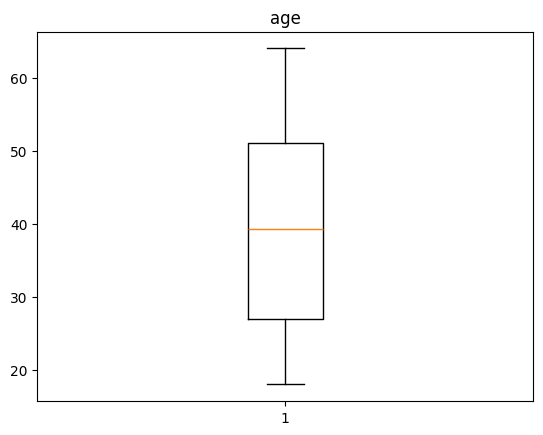

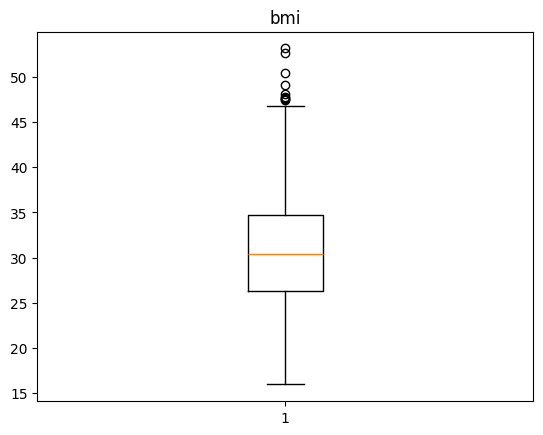

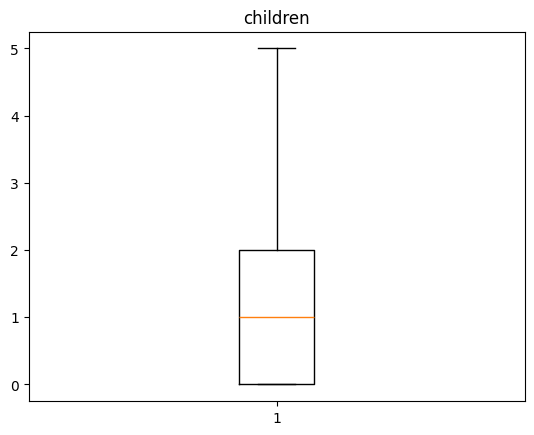

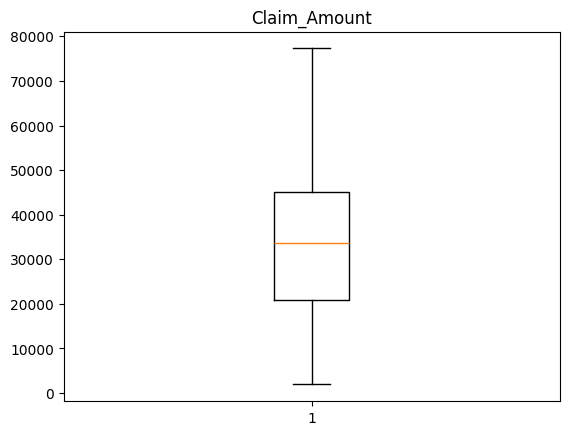

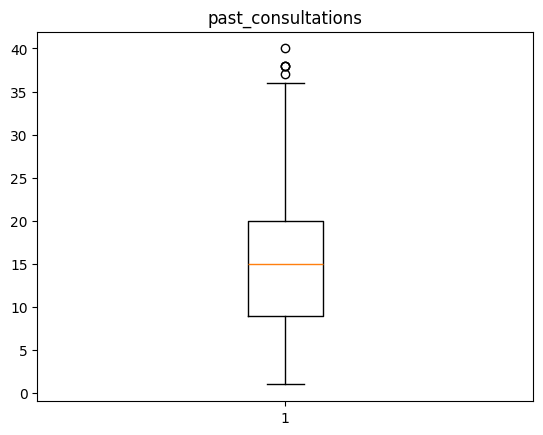

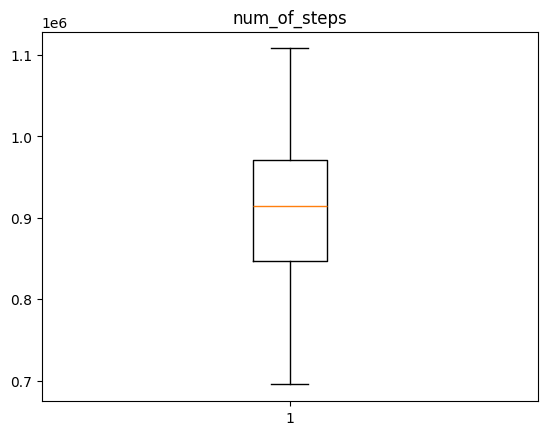

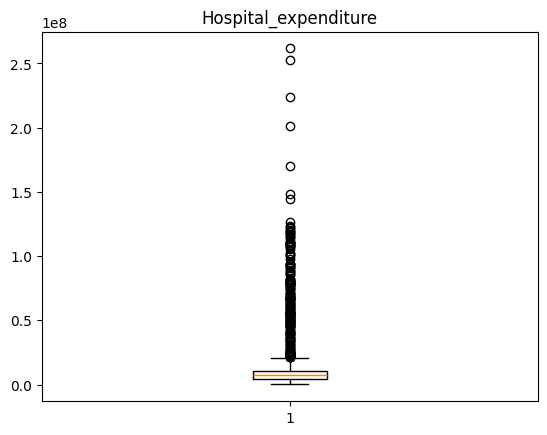

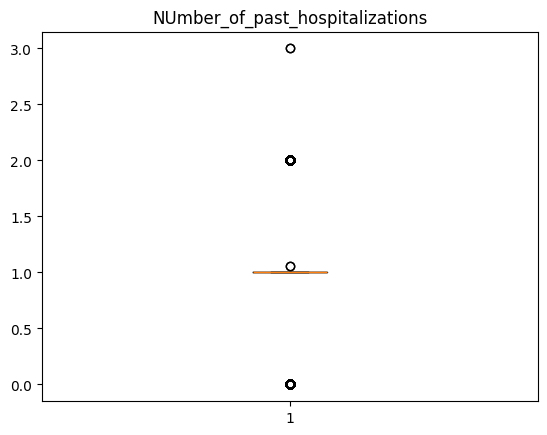

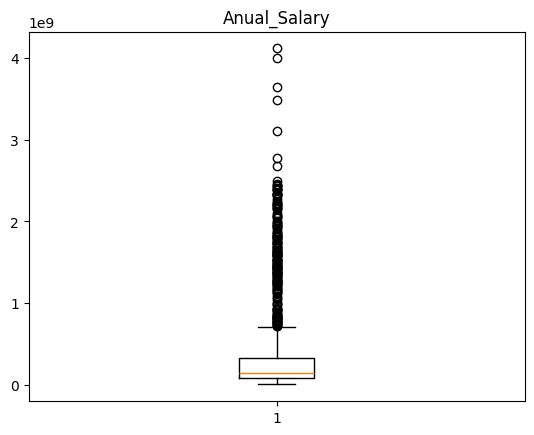

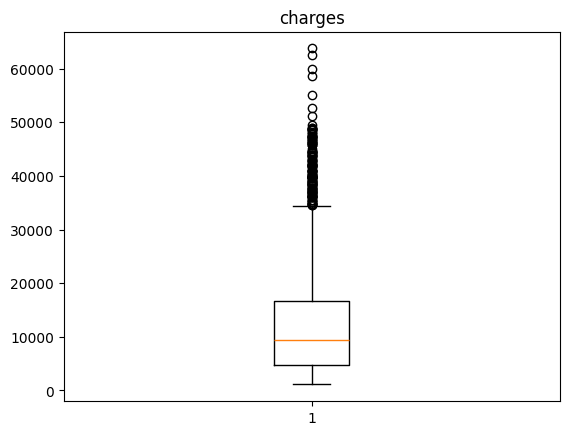

In [ ]:
for i in col:
  if(df[i].dtype !='object'):
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [14]:
#how to remove outliers
for i in col:
  if df[i].dtype != 'object':
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [15]:
df.shape

(881, 13)

In [16]:
1338-881

457

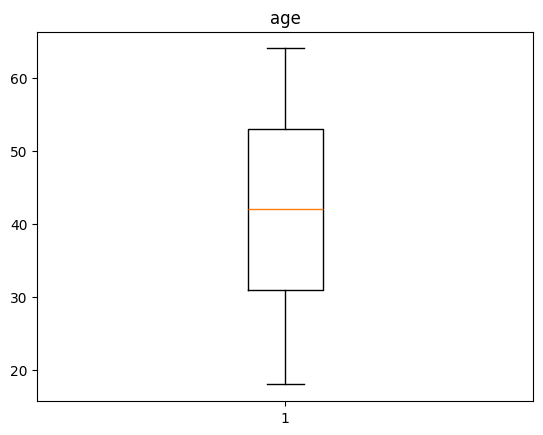

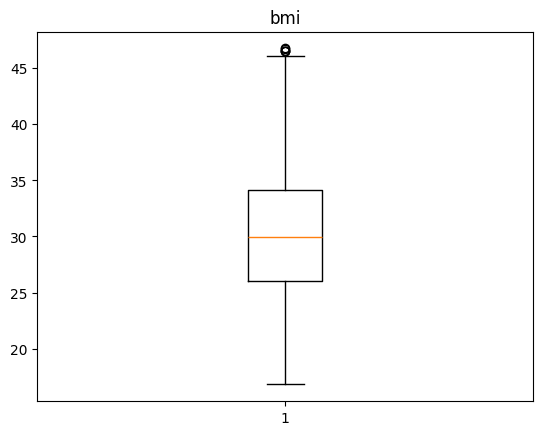

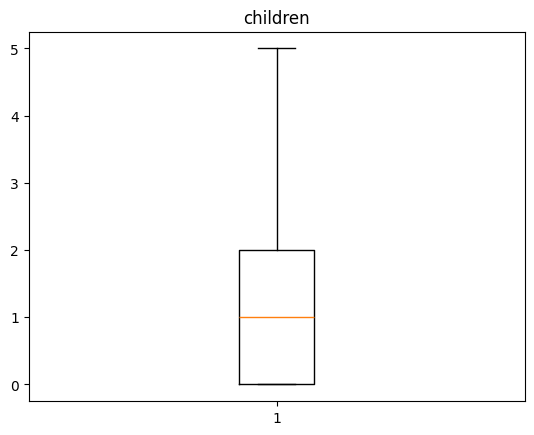

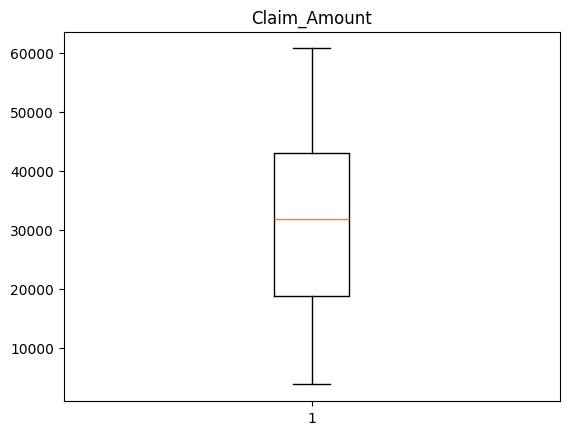

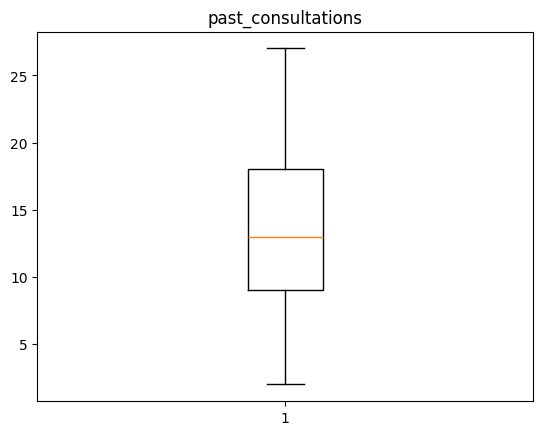

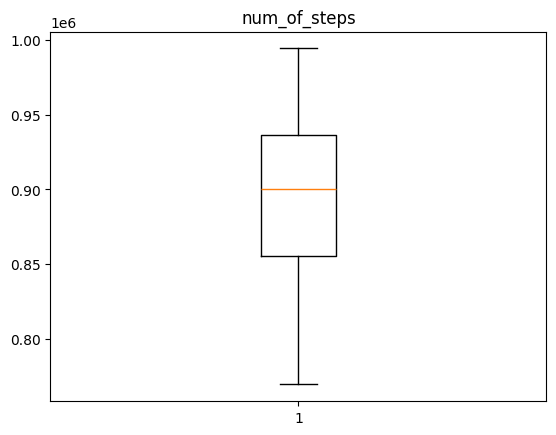

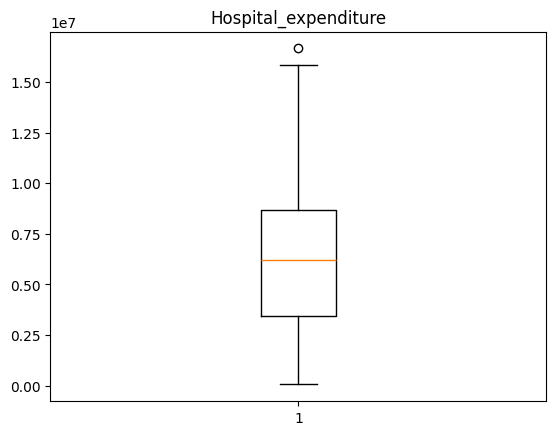

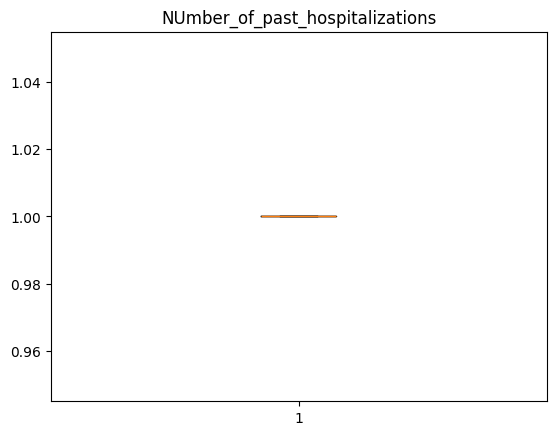

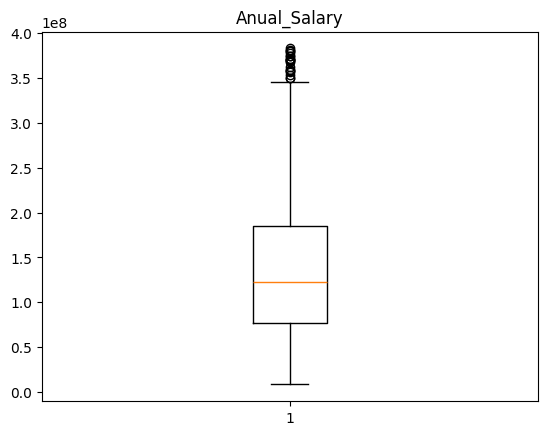

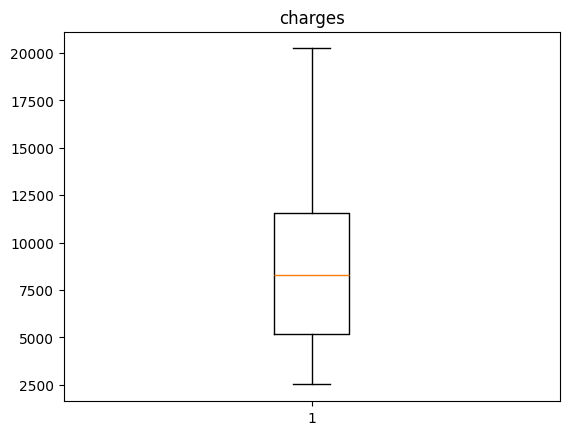

In [17]:
for i in col:
  if(df[i].dtype !='object'):
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [21]:
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

In [22]:
df

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
151,25.0,1,27.550,0.0,0,39148.95495,10.0,780652.0,8.614147e+06,1.0,5.452601e+07,1,2523.16950
152,22.0,0,20.235,0.0,0,41547.52536,13.0,802627.0,2.491594e+05,1.0,1.671847e+07,1,2527.81865
153,25.0,1,35.625,0.0,0,39660.60193,12.0,770773.0,3.043323e+06,1.0,4.852694e+07,1,2534.39375
154,20.0,1,31.130,2.0,0,16032.87148,7.0,769255.0,1.599069e+06,1.0,2.441262e+07,2,2566.47070
155,21.0,0,17.400,1.0,0,31090.98977,21.0,778769.0,3.015365e+06,1.0,5.853579e+07,3,2585.26900
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,29.0,0,27.940,1.0,1,51168.25474,23.0,993751.0,1.665982e+07,1.0,3.712188e+08,2,19107.77960
1048,31.0,1,25.900,3.0,1,46619.40230,27.0,989387.0,1.361938e+07,1.0,3.812895e+08,3,19199.94400
1050,31.0,1,29.810,0.0,1,24382.58056,21.0,973924.0,1.028991e+07,1.0,3.745310e+08,2,19350.36890
1062,43.0,0,20.045,2.0,1,21596.43846,10.0,994419.0,1.083030e+07,1.0,3.696849e+08,0,19798.05455


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 881 entries, 151 to 1069
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              881 non-null    float64
 1   sex                              881 non-null    int64  
 2   bmi                              881 non-null    float64
 3   children                         881 non-null    float64
 4   smoker                           881 non-null    int64  
 5   Claim_Amount                     881 non-null    float64
 6   past_consultations               881 non-null    float64
 7   num_of_steps                     881 non-null    float64
 8   Hospital_expenditure             881 non-null    float64
 9   NUmber_of_past_hospitalizations  881 non-null    float64
 10  Anual_Salary                     881 non-null    float64
 11  region                           881 non-null    int64  
 12  charges                 

train means training test means testing

learning phase x_train---training questions y_train----training answers

testing phase

x_test --- testing questions

y_pred --- model answers/machine answers

compare

y_pred vs y_test

In [ ]:
#model building
#import libraries
#spliting the data into x and y
#train_test_split
#train
#test
#evaluate-r2score,mae,mse,rmse

In [24]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [26]:
x = df.drop(columns=['charges']) #all independent columns
y = df['charges'] #target columns

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.70,random_state = 42)

In [28]:
my_model = LinearRegression()

In [29]:
#training
my_model.fit(x_train,y_train)

LinearRegression()

In [30]:
#testing
y_pred = my_model.predict(x_test)

In [31]:
y_pred

array([ 7615.38598482,  5284.91677765,  9478.85059092, 11094.09834594,
        7183.54346144,  3140.06964172, 10177.57697441, 13247.11715384,
        8609.57107816, 11925.55151923, 12380.16469654, 12312.4463159 ,
        6146.42290531, 14985.75698304, 13586.75338351,  8009.09307665,
        6279.84123779,  7179.16623229,  8050.67813764, 11851.87174895,
        8084.70897479,  1680.95050812,  7628.41763496,  1753.10637192,
        6736.72538964, 12654.82254554,  7382.26502009, 14037.62807987,
       11589.26847449,  6997.71849531,  9642.23484092,  3308.9971185 ,
        7856.98797681,  5101.95213066,  8246.63451924,  5801.3327961 ,
        2727.57156818, 10323.64031077,  6613.31783782,  2061.99486506,
        5808.22194616,  3599.18909761, 18393.46148776,  8983.46671354,
       11776.79849758,  4944.50632841, 12817.82123731,  7772.74016374,
        2947.48819026, 11900.40744283,  6280.43256371, 15049.03889522,
        9935.79149642,  4397.53049751, 15121.63504695,  7546.3826633 ,
      

In [32]:
result = pd.DataFrame(columns=['Actual_value','Predicted'])
result['Actual_value'] = y_test
result['Predicted'] = y_pred
result

,Actual_value,Predicted
501,6986.69700,7615.385985
405,5615.36900,5284.916778
642,8944.11510,9478.850591
843,11945.13270,11094.098346
544,7512.26700,7183.543461
...,...,...
323,4618.07990,4835.473887
1062,19798.05455,19018.007934
453,6356.27070,6311.611439
666,9304.70190,10833.130426


In [33]:
from sklearn.metrics  import *

In [34]:
result = r2_score(y_test,y_pred)
result

0.9628760660643421

In [35]:
mae = mean_absolute_error(y_test,y_pred)
mae

604.8944614993266

In [36]:
mse = mean_squared_error(y_test,y_pred)
mse

579299.4775871104

In [37]:
#rmse
rmse =np.sqrt(mse)
rmse

np.float64(761.1172561354199)

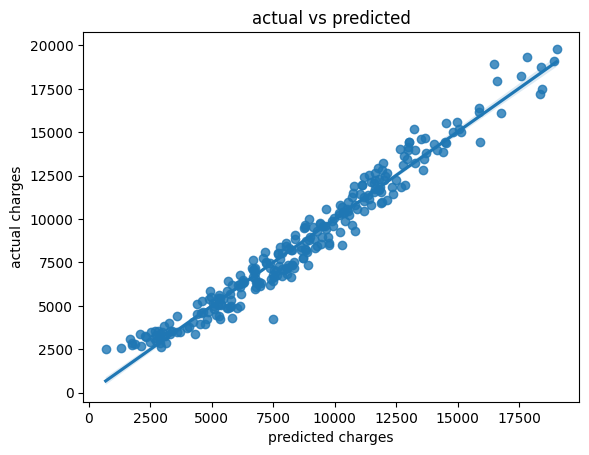

In [38]:
sns.regplot(x=y_pred,y=y_test)
plt.xlabel("predicted charges")
plt.ylabel("actual charges")
plt.title("actual vs predicted")
plt.show()